Processing file: trends_tracking_2024-07-08_15-11.json
Processing file: trends_tracking_2024-07-08_18-58.json
Processing file: trends_tracking_2024-07-08_23-11.json
Processing file: trends_tracking_2024-07-09_13-40.json
Processing file: trends_tracking_2024-07-09_21-54.json
Processing file: trends_tracking_2024-07-10_12-28.json


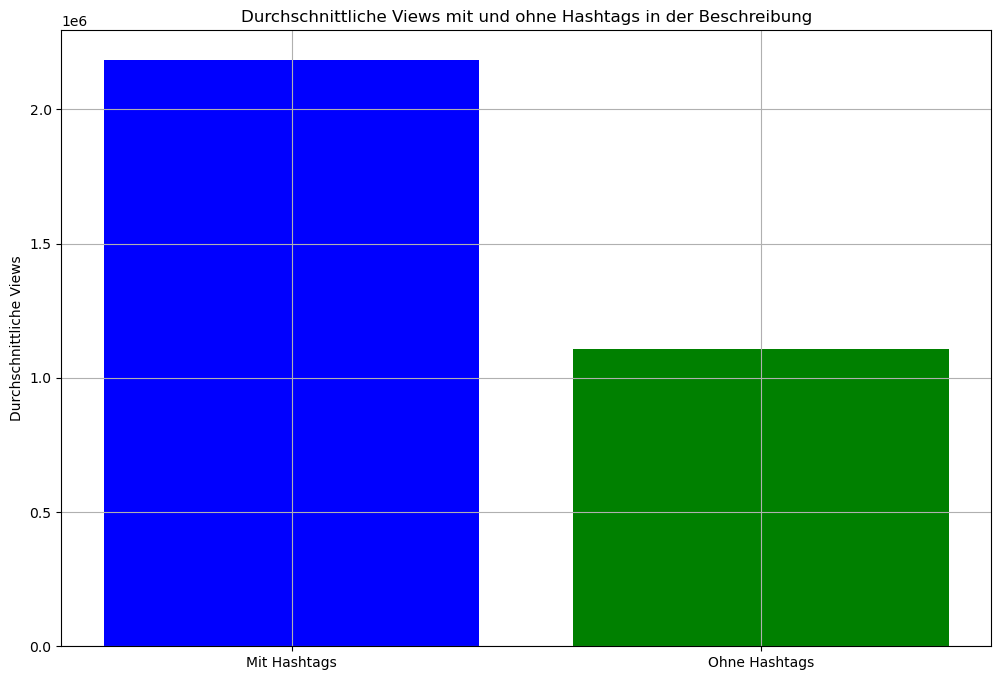

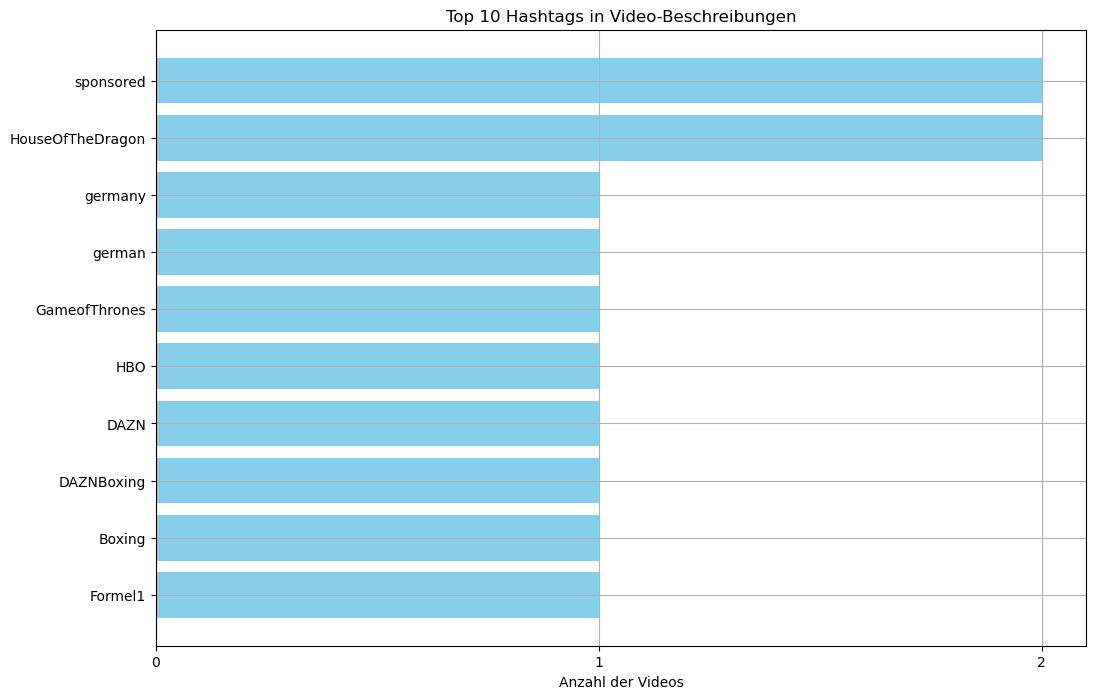

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter

def load_data_from_folder(folder_path):
    all_videos = []
    
    # Iteriere durch alle Dateien im Ordner
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                data = json.load(file)
                print(f'Found file: {file_path}')
                videos = data.get('videos', [])
                all_videos.extend(videos)

    
    return all_videos

# entfernt videos die doppelt sind
def remove_duplicates(videos):
    seen = set()
    unique_videos = []
    for video in reversed(videos):
        video_url = video.get('video_url')
        if video_url not in seen:
            unique_videos.append(video)
            seen.add(video_url)
    return list(reversed(unique_videos))

def extract_hashtags(description):
    # Regex-Pattern zur Extraktion von Hashtags
    hashtags = re.findall(r'#(\w+)', description)
    return hashtags

def generate_plots(df_with_hashtags, df_without_hashtags):
    # Vergleich der durchschnittlichen Views
    avg_views_with_hashtags = df_with_hashtags['views'].mean()
    avg_views_without_hashtags = df_without_hashtags['views'].mean()
    
    # Plot der durchschnittlichen Views
    plt.figure(figsize=(12, 8))
    plt.bar(['Mit Hashtags', 'Ohne Hashtags'], [avg_views_with_hashtags, avg_views_without_hashtags], color=['blue', 'green'])
    plt.title('Durchschnittliche Views mit und ohne Hashtags in der Beschreibung')
    plt.ylabel('Durchschnittliche Views')
    plt.grid(True)
    plt.show()
    
    # Extrahiere und zähle Hashtags in den Videos mit Hashtags
    all_hashtags = []
    for description in df_with_hashtags['description']:
        hashtags = extract_hashtags(description)
        all_hashtags.extend(hashtags)
    
    # Berechne die Häufigkeit der Hashtags
    hashtag_counter = Counter(all_hashtags)
    top_hashtags = hashtag_counter.most_common(10)
    
    hashtag_labels, hashtag_counts = zip(*top_hashtags)
    
    plt.figure(figsize=(12, 8))
    plt.barh(hashtag_labels, hashtag_counts, color='skyblue')
    plt.xlabel('Anzahl der Videos')
    plt.xticks(range(0, max(hashtag_counts) + 1, 1))  # Setze die xticks auf 1er Schritte
    plt.title('Top 10 Hashtags in Video-Beschreibungen')
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.show()

def main():
    folder_path = 'scraped_data/'
    all_videos = []
    
    # Iteriere durch alle Dateien im Ordner
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            print(f'Processing file: {filename}')
            
            # Laden der Daten aus der JSON-Datei
            with open(file_path, 'r', encoding='utf-8') as file:
                data = json.load(file)

                videos = data.get('videos', [])

                unique_videos = remove_duplicates(videos)
                                
                all_videos.extend(unique_videos)
    
    all_videos = remove_duplicates(all_videos)

    df = pd.DataFrame(all_videos)
    
    # bereinigen der Views Spalte
    df['views'] = df['views'].str.replace('.', '').astype(int)
    # df mit Liste aller hashtags in der jeweiligen beschreibung
    df['hashtags'] = df['description'].apply(extract_hashtags)
    # df has_hashtags auf true wenn ein hashtag gefunden wurde
    df['has_hashtags'] = df['hashtags'].apply(lambda x: len(x) > 0)

    #hinzufügen der neuen spalten
    df_with_hashtags = df[df['has_hashtags']]

    df_without_hashtags = df[~df['has_hashtags']]
    

    # Generieren der Plots für alle Daten
    generate_plots(df_with_hashtags, df_without_hashtags)

# Aufruf der Hauptfunktion
main()
